In [11]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

In [12]:
BASE_DIR = "/Users/akshatha/GeorgakopoulosSoaresLab/g4_analysis"
COUNTS = f"{BASE_DIR}/results/counts.txt"
VENN_DIAGRAM_1BP = f"{BASE_DIR}/plots/counts_venn_1bp.png"
VENN_DIAGRAM_50_PC = f"{BASE_DIR}/plots/counts_venn_50pc.png"

In [13]:
# get counts
with open (COUNTS, 'r') as f:
    counts = f.read().splitlines()
    counts = [i.split(": ") for i in counts]
data = {i[0]: int(i[1]) for i in counts}
print(data)

{'G4Hunter': 109874605, 'Regex': 30306672, 'Intersect (min 1bp)': 22003704, 'Intersect (min 50%)': 21735558}


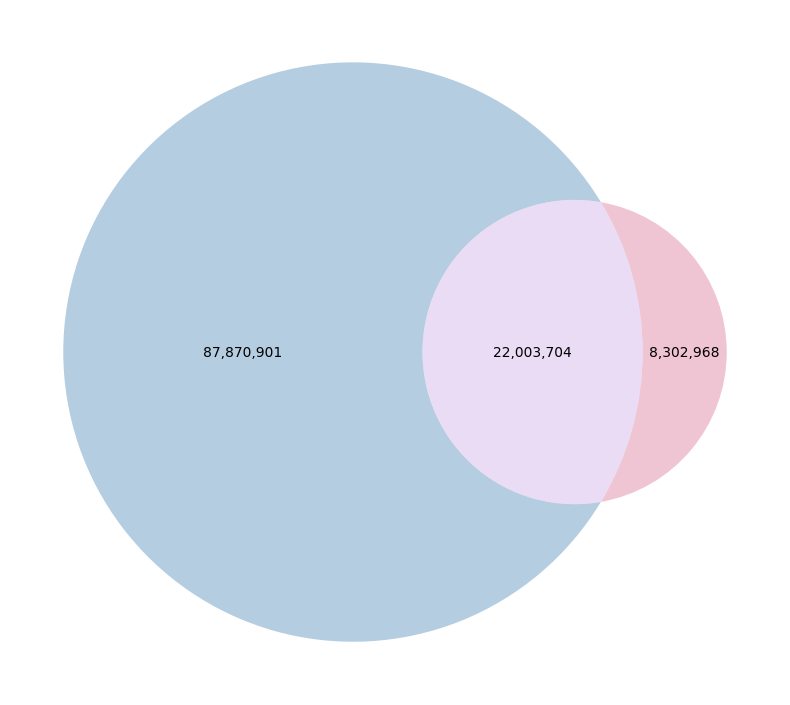

In [16]:
# plot venn diagram for 1bp overlap
plt.figure(figsize=(8,8))
# specify colors
colors = ['steelblue', 'palevioletred']
v = venn2(subsets = (data['G4Hunter']-data['Intersect (min 1bp)'], data['Regex']-data['Intersect (min 1bp)'], data['Intersect (min 1bp)']), 
      set_labels = None,
      set_colors=colors,
      subset_label_formatter=lambda num: "{:,}".format(num))
plt.tight_layout()
plt.savefig(VENN_DIAGRAM_1BP)

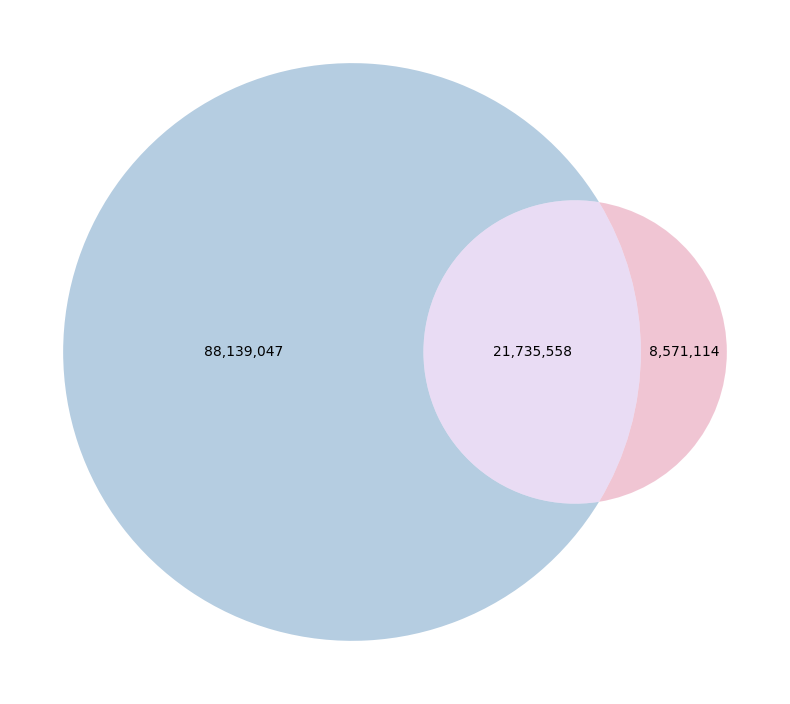

In [17]:
# plot venn diagram for 50% overlap
plt.figure(figsize=(8,8))
v = venn2(subsets = (data['G4Hunter']-data['Intersect (min 50%)'], data['Regex']-data['Intersect (min 50%)'], data['Intersect (min 50%)']), 
	  set_labels = None,
	  set_colors=colors,
	  subset_label_formatter=lambda num: "{:,}".format(num))
plt.tight_layout()
plt.savefig(VENN_DIAGRAM_50_PC)